In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loc1 = pd.read_csv("/kaggle/input/wind-power-generation-data-forecasting/Location1.csv")
loc2 = pd.read_csv("/kaggle/input/wind-power-generation-data-forecasting/Location2.csv")
loc3 = pd.read_csv("/kaggle/input/wind-power-generation-data-forecasting/Location3.csv")
loc4 = pd.read_csv("/kaggle/input/wind-power-generation-data-forecasting/Location4.csv")

In [3]:
loc1.shape

(43800, 10)

In [4]:
loc1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [5]:
loc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [6]:
loc1['Time'] = pd.to_datetime(loc1['Time'])
print("Updated Information for Location1 DataFrame:")

loc1['Year']=loc1['Time'].dt.year
loc1['Month']=loc1['Time'].dt.month

loc1.info()

Updated Information for Location1 DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 43800 non-null  datetime64[ns]
 1   temperature_2m       43800 non-null  float64       
 2   relativehumidity_2m  43800 non-null  int64         
 3   dewpoint_2m          43800 non-null  float64       
 4   windspeed_10m        43800 non-null  float64       
 5   windspeed_100m       43800 non-null  float64       
 6   winddirection_10m    43800 non-null  int64         
 7   winddirection_100m   43800 non-null  int64         
 8   windgusts_10m        43800 non-null  float64       
 9   Power                43800 non-null  float64       
 10  Year                 43800 non-null  int32         
 11  Month                43800 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(2),

In [7]:
np.sum(loc1.isna())

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Year                   0
Month                  0
dtype: int64

In [8]:
loc1.describe()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Year,Month
count,43800,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,2019-07-03 11:30:00,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385,2019.001644,6.526575
min,2017-01-02 00:00:00,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000,2017.000000,1.000000
25%,2018-04-03 05:45:00,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900,2018.000000,4.000000
50%,2019-07-03 11:30:00,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650,2019.000000,7.000000
75%,2020-10-01 17:15:00,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600,2020.000000,10.000000
max,2021-12-31 23:00:00,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300,2021.000000,12.000000
std,NaN,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322,1.413647,3.447092


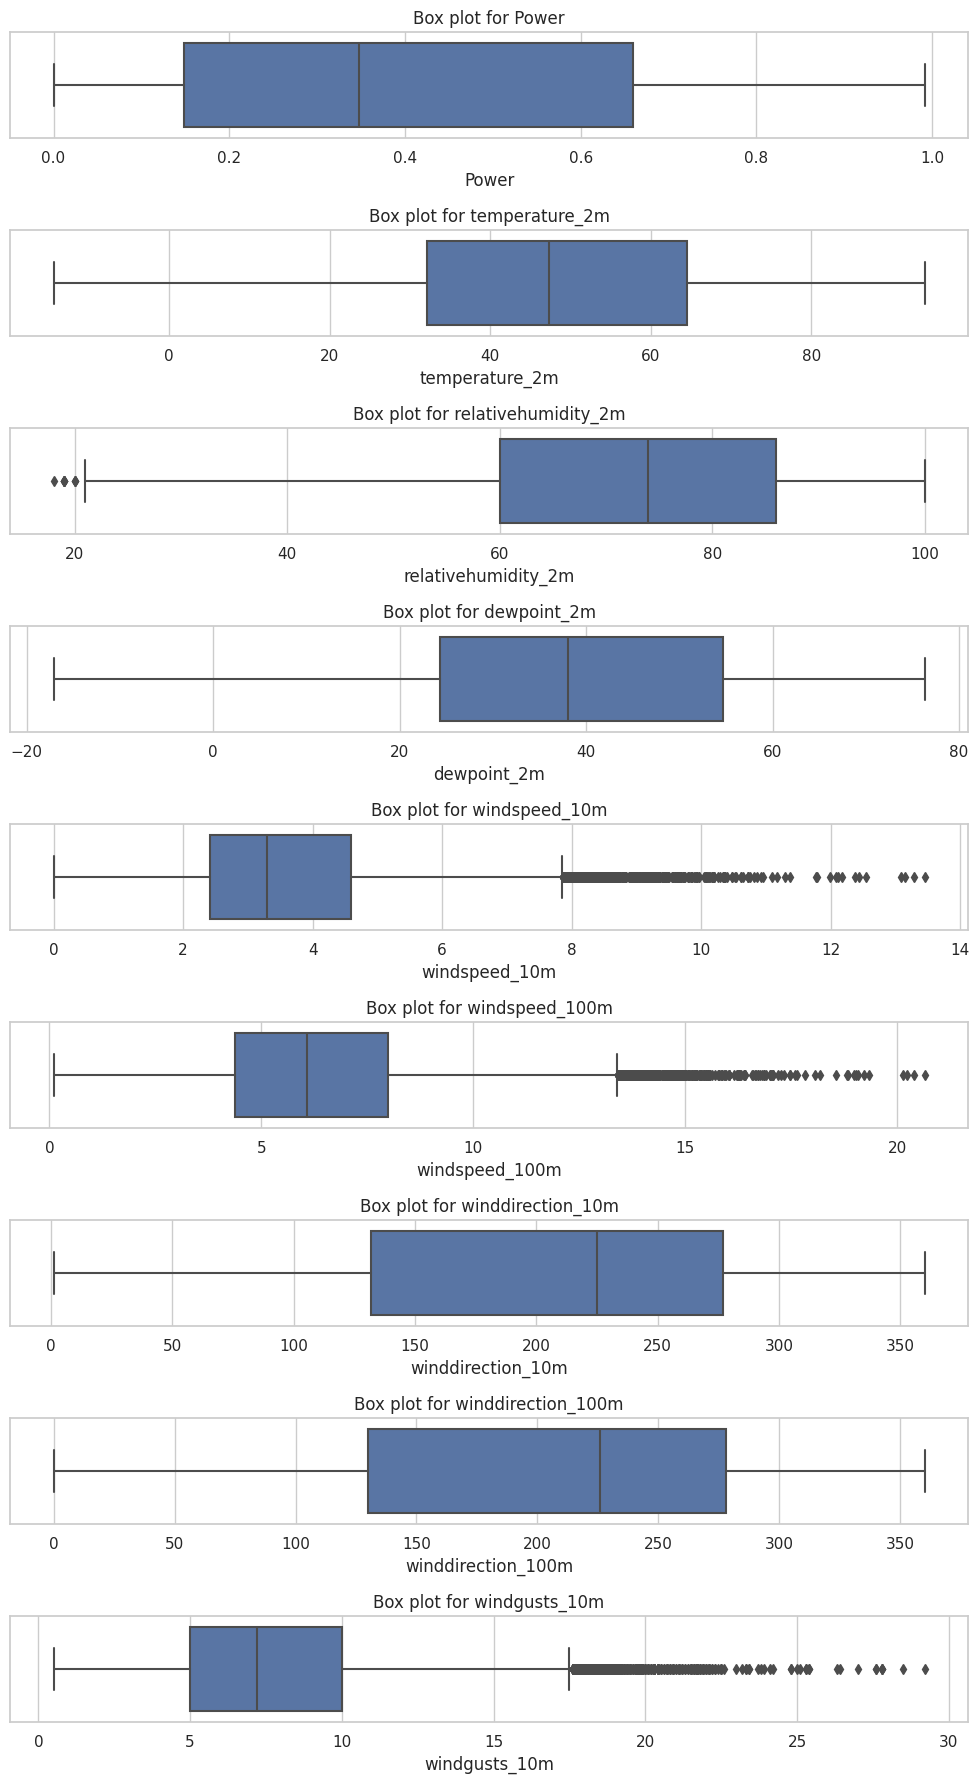

In [9]:
numeric_columns = ['Power', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m']
# Set the style of seaborn
sns.set(style="whitegrid")
# Create subplots for numeric columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 2*len(numeric_columns)))
# Create box plots for numeric columns
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=loc1[column], ax=axes[i], orient='h')
    axes[i].set_title(f'Box plot for {column}')
# Adjust layout for numeric columns
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result 

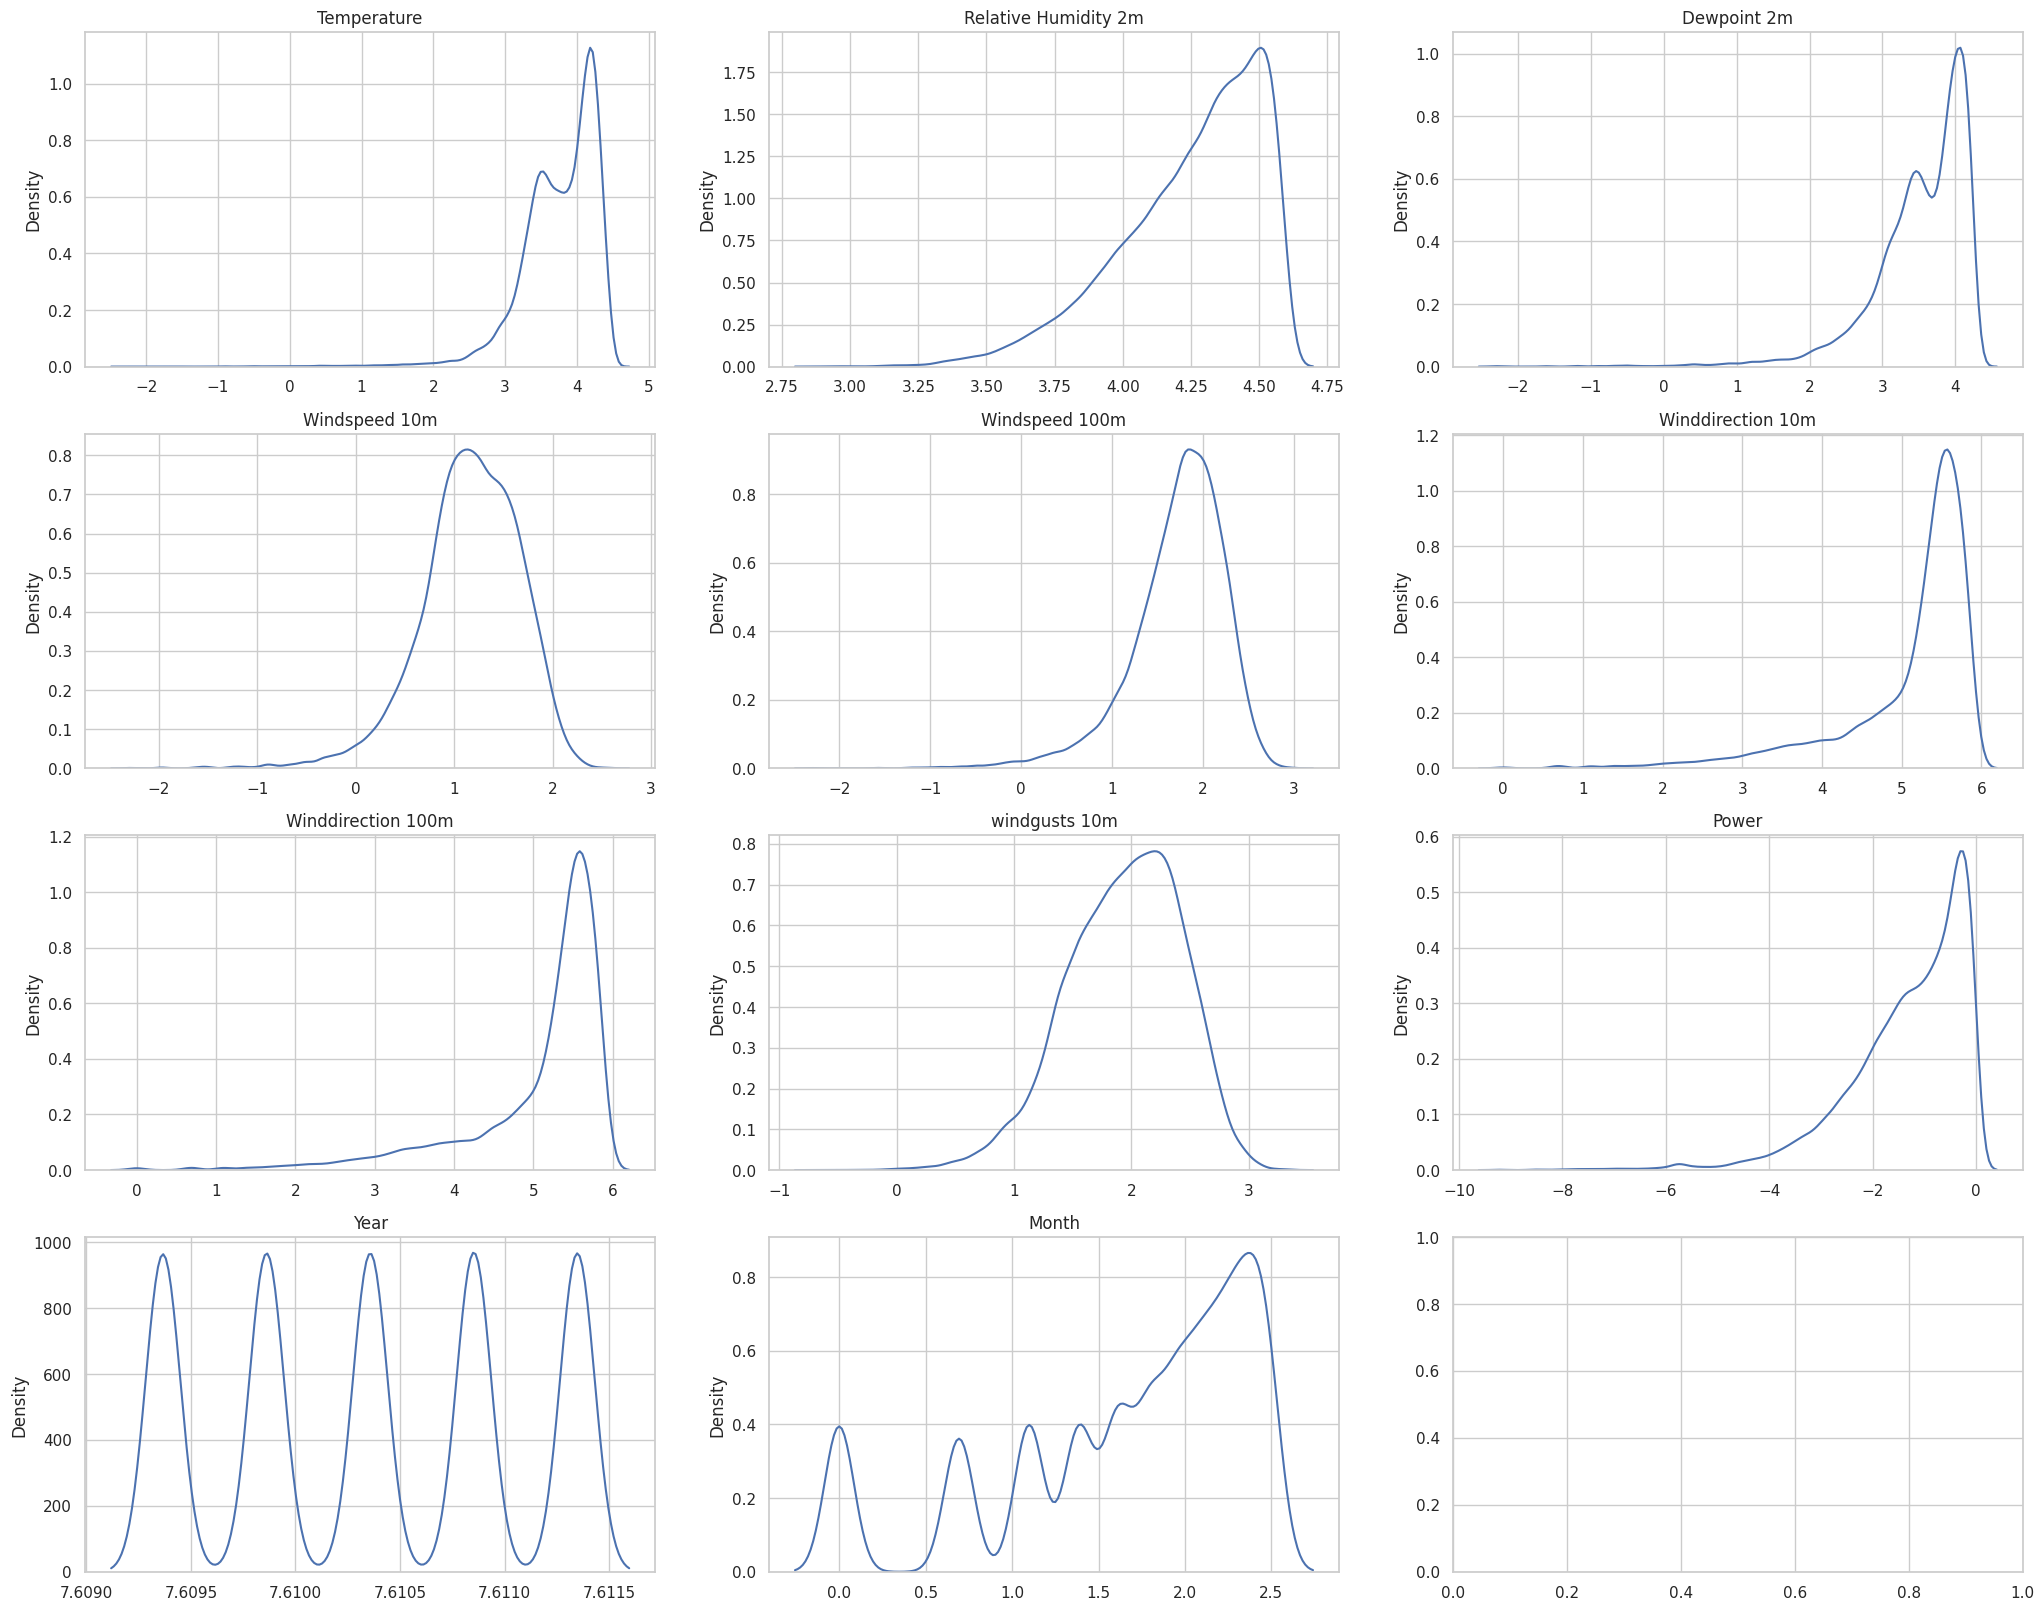

In [10]:
fig, axes = plt.subplots(4,3, figsize=(25,20))
sns.kdeplot(np.log(loc1['temperature_2m']),ax=axes[0,0]).set(xlabel='', title='Temperature')
sns.kdeplot(np.log(loc1['relativehumidity_2m']),ax=axes[0,1]).set(xlabel='', title='Relative Humidity 2m')
sns.kdeplot(np.log(loc1['dewpoint_2m']),ax=axes[0,2]).set(xlabel='', title='Dewpoint 2m')
sns.kdeplot(np.log(loc1['windspeed_10m']),ax=axes[1,0]).set(xlabel='', title='Windspeed 10m')
sns.kdeplot(np.log(loc1['windspeed_100m']),ax=axes[1,1]).set(xlabel='', title='Windspeed 100m')
sns.kdeplot(np.log(loc1['winddirection_10m']),ax=axes[1,2]).set(xlabel='', title='Winddirection 10m')
sns.kdeplot(np.log(loc1['winddirection_100m']),ax=axes[2,0]).set(xlabel='', title='Winddirection 100m')
sns.kdeplot(np.log(loc1['windgusts_10m']),ax=axes[2,1]).set(xlabel='', title='windgusts 10m')
sns.kdeplot(np.log(loc1['Power']),ax=axes[2,2]).set(xlabel='', title='Power')
sns.kdeplot(np.log(loc1['Year']),ax=axes[3,0]).set(xlabel='', title='Year')
sns.kdeplot(np.log(loc1['Month']),ax=axes[3,1]).set(xlabel='', title='Month')
plt.show()

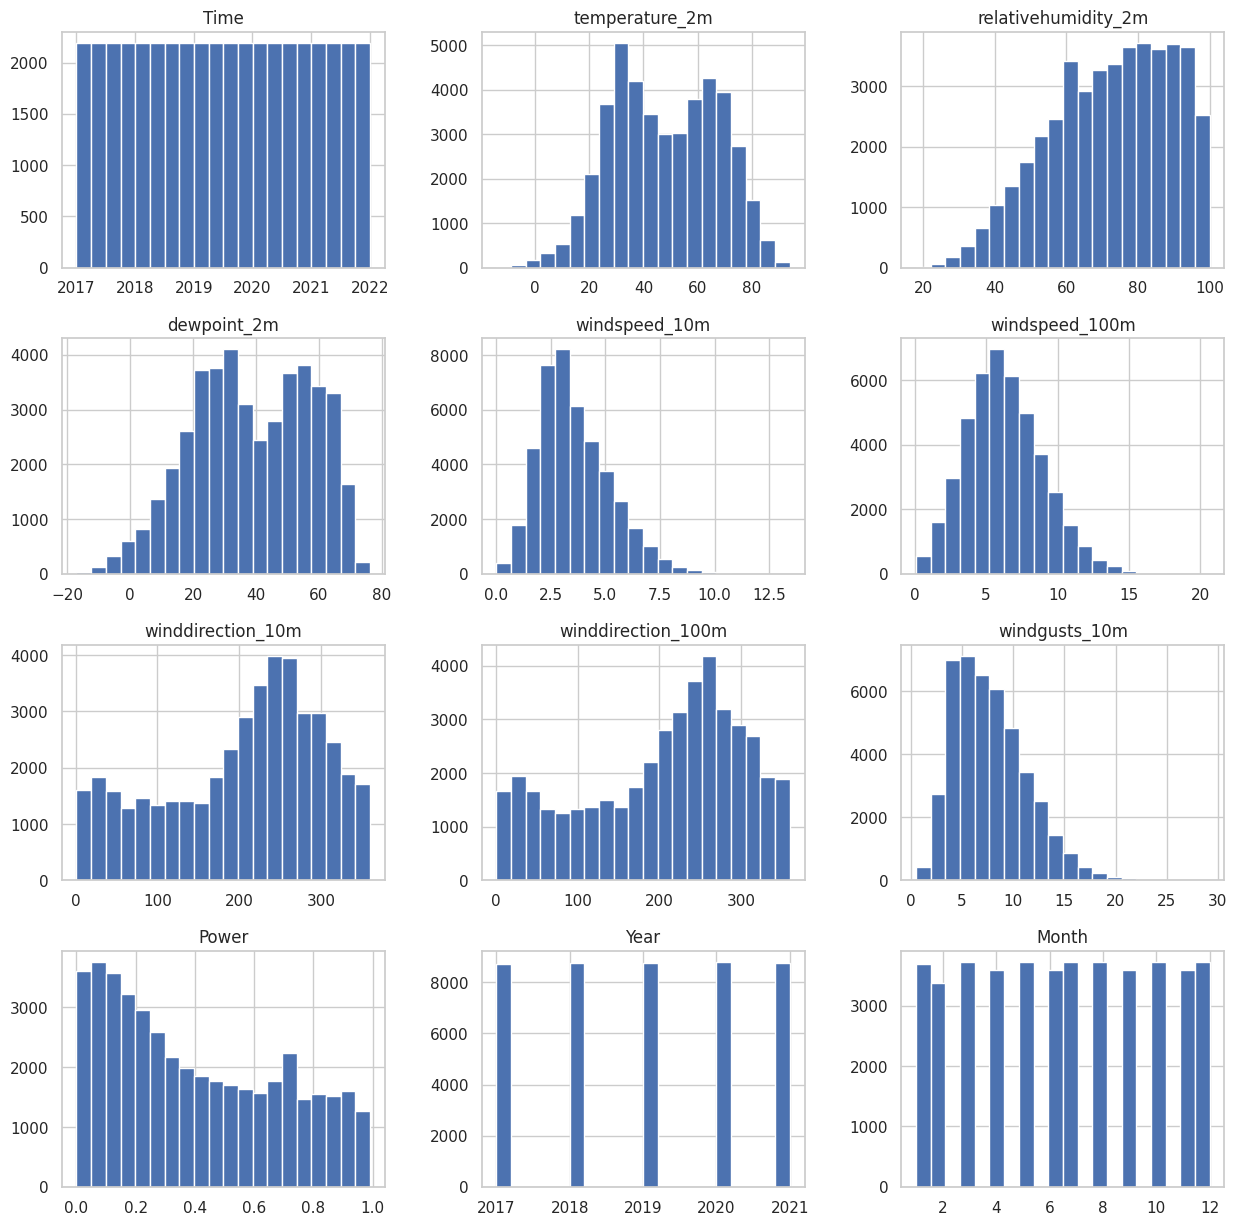

In [11]:
loc1.hist(bins=20, figsize=(15, 15))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

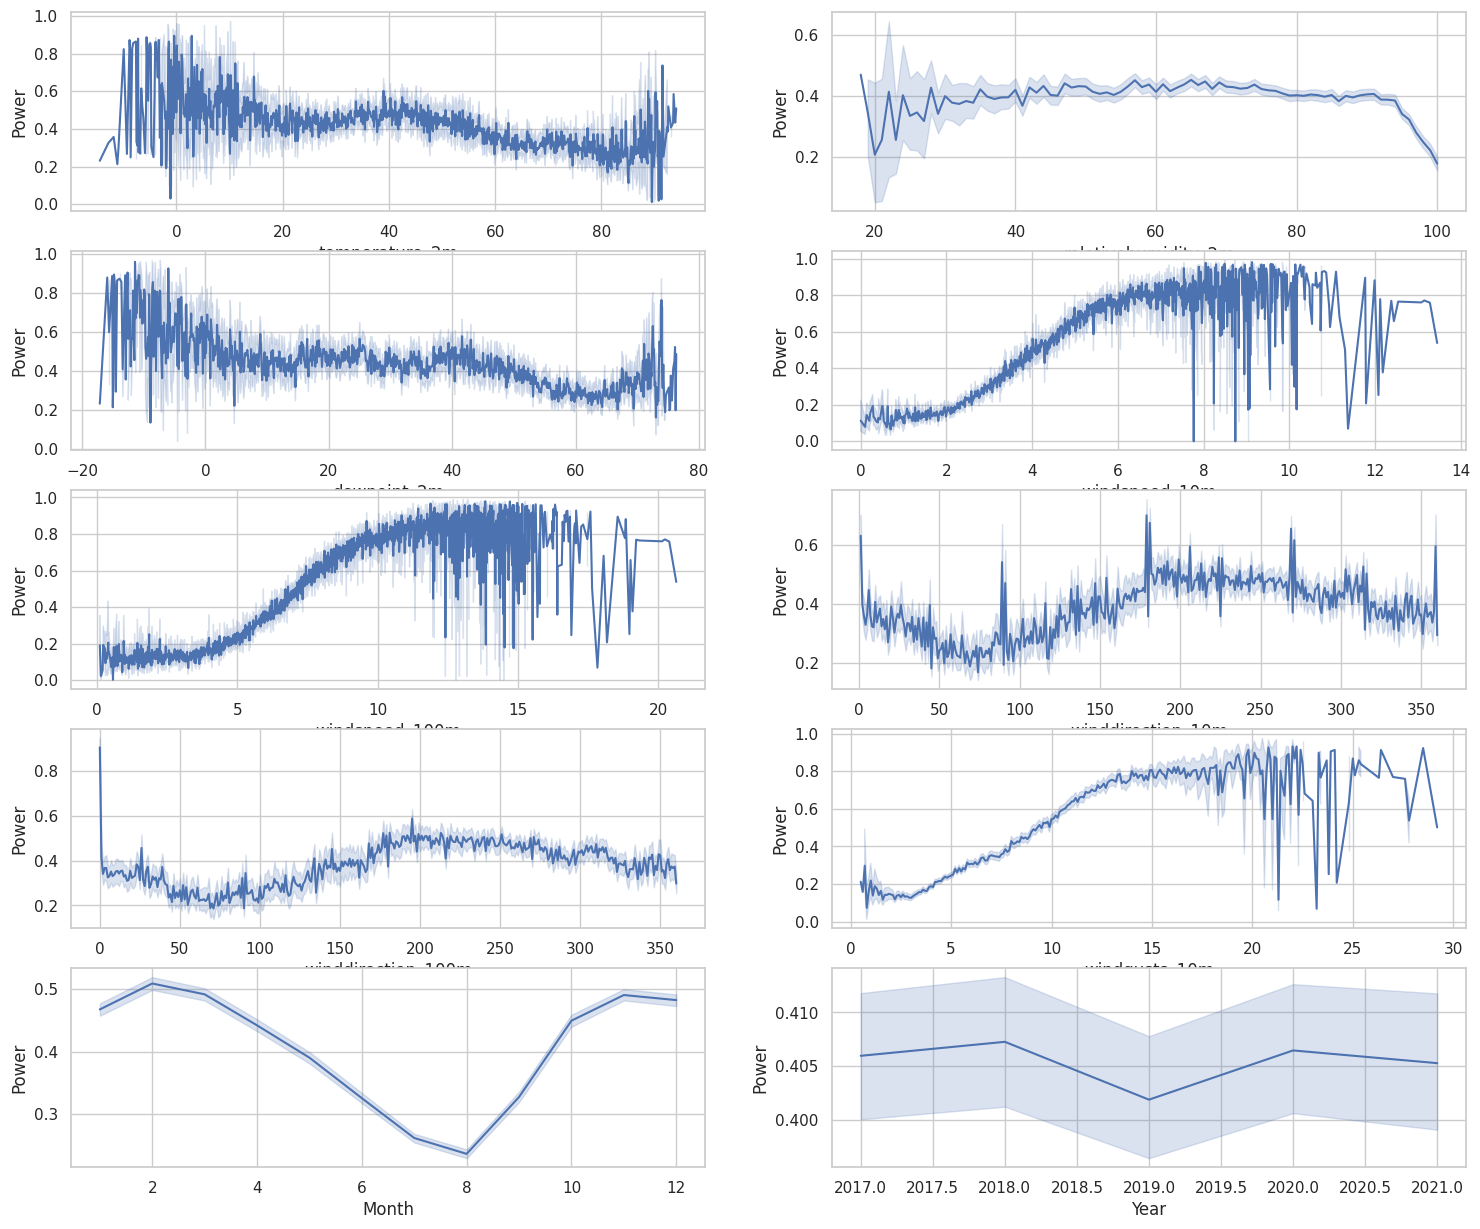

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(18, 15))

sns.lineplot(data=loc1, y="Power", x="temperature_2m", ax=axes[0, 0]).set(xlabel='temperature_2m', ylabel='Power')
sns.lineplot(data=loc1, y="Power", x="relativehumidity_2m", ax=axes[0, 1]).set(xlabel='relativehumidity_2m', ylabel='Power')
sns.lineplot(data=loc1, y="Power", x="dewpoint_2m", ax=axes[1, 0]).set(xlabel='dewpoint_2m', ylabel='Power')
sns.lineplot(data=loc1, y="Power", x="windspeed_10m", ax=axes[1, 1]).set(xlabel='windspeed_10m', ylabel='Power')
sns.lineplot(data=loc1, y="Power", x="windspeed_100m", ax=axes[2, 0]).set(xlabel='windspeed_100m', ylabel='Power')
sns.lineplot(data=loc1, y="Power", x="winddirection_10m", ax=axes[2, 1]).set(xlabel='winddirection_10m', ylabel='Power')
sns.lineplot(data=loc1, y="Power", x="winddirection_100m", ax=axes[3, 0]).set(xlabel='winddirection_100m', ylabel='Power')
sns.lineplot(data=loc1, y="Power", x="windgusts_10m", ax=axes[3, 1]).set(xlabel='windgusts_10m', ylabel='Power')
sns.lineplot(data=loc1, y="Power", x="Month", ax=axes[4, 0]).set(xlabel='Month', ylabel='Power')
sns.lineplot(data=loc1, y="Power", x="Year", ax=axes[4, 1]).set(xlabel='Year', ylabel='Power')

plt.show()

<Axes: xlabel='Year'>

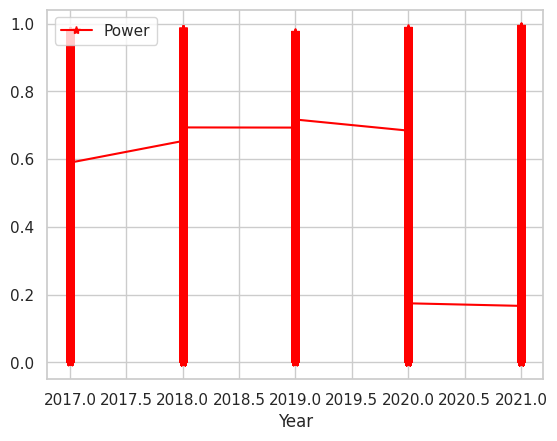

In [13]:
loc1.plot('Year','Power',color='red',marker='*')

In [14]:
corr_table = round(loc1[['Time','Power', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m','Year','Month']].corr(method = 'pearson'), 2)
corr_table

,Time,Power,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Year,Month
Time,1.00,-0.01,0.08,0.01,0.09,-0.03,-0.03,0.01,0.01,-0.04,0.98,0.20
Power,-0.01,1.00,-0.21,-0.07,-0.22,0.73,0.78,0.16,0.17,0.66,-0.00,-0.06
temperature_2m,0.08,-0.21,1.00,-0.14,0.93,-0.11,-0.17,-0.15,-0.15,-0.01,0.03,0.26
relativehumidity_2m,0.01,-0.07,-0.14,1.00,0.22,-0.22,-0.05,-0.08,-0.09,-0.34,-0.01,0.11
dewpoint_2m,0.09,-0.22,0.93,0.22,1.00,-0.19,-0.18,-0.18,-0.18,-0.13,0.03,0.30
windspeed_10m,-0.03,0.73,-0.11,-0.22,-0.19,1.00,0.93,0.17,0.18,0.94,-0.02,-0.06
windspeed_100m,-0.03,0.78,-0.17,-0.05,-0.18,0.93,1.00,0.16,0.18,0.82,-0.02,-0.04
winddirection_10m,0.01,0.16,-0.15,-0.08,-0.18,0.17,0.16,1.00,0.90,0.16,0.01,0.02
winddirection_100m,0.01,0.17,-0.15,-0.09,-0.18,0.18,0.18,0.90,1.00,0.17,0.01,0.02
windgusts_10m,-0.04,0.66,-0.01,-0.34,-0.13,0.94,0.82,0.16,0.17,1.00,-0.02,-0.07


<Axes: >

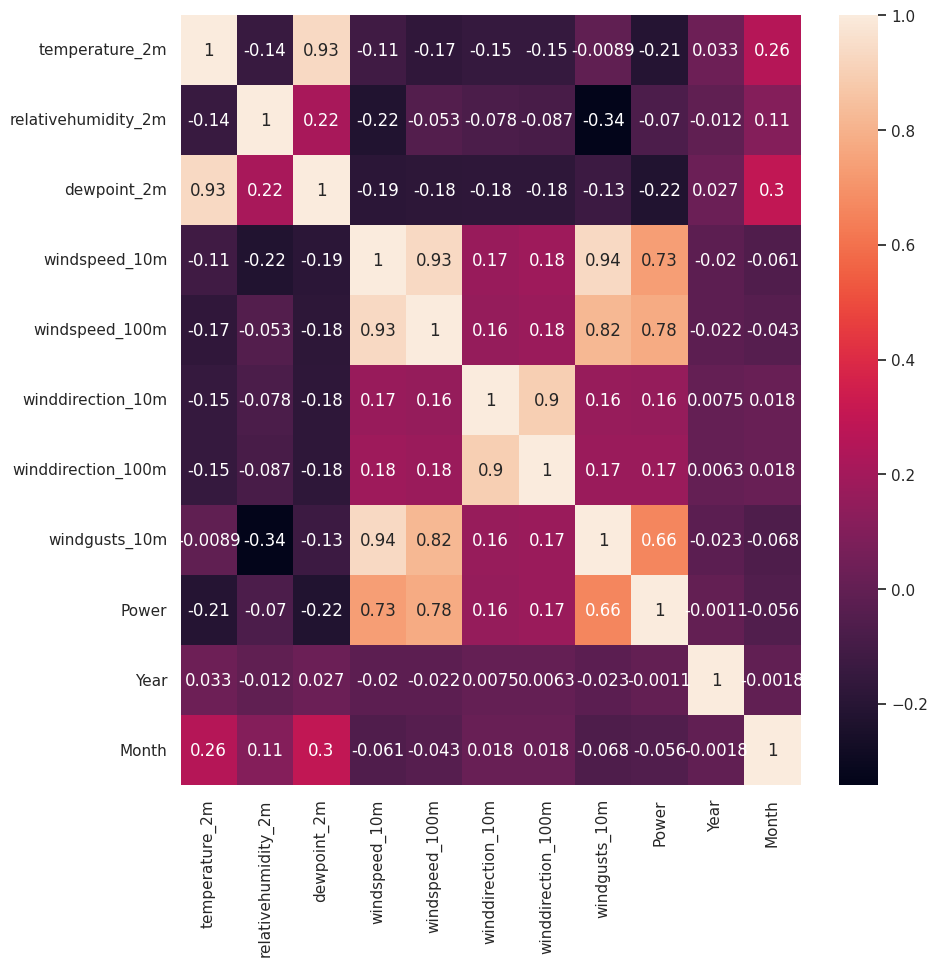

In [15]:
# HEATMAP FOR VIZUAL CORRELATION
sns.set(rc={"figure.figsize": (10,10)})
sns.heatmap(loc1.corr(numeric_only=True),annot=True)

In [16]:
### MULTIVARIATE/LINEAR REGRESSION ###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
features = ['Year','Month','Power','temperature_2m','relativehumidity_2m','dewpoint_2m','windspeed_10m','windspeed_100m','winddirection_10m','winddirection_100m','windgusts_10m']

In [18]:
X = loc1[features]
y = loc1['Power']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
print('R square:', model.score(X_test, y_test))
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

R square: 1.0
Coefficient:  [-3.87006668e-16 -6.73072709e-16  1.00000000e+00  1.86808034e-16
 -1.11266248e-16  2.37657116e-16 -1.24776085e-15  2.12530731e-16
  3.10515502e-16  2.65304272e-16  1.13028076e-17]
Intercept:  6.628586568524497e-13


In [21]:
prediction = model.predict(X_test)

In [22]:
pred_df = pd.DataFrame({"Value": y_test, "Pred": prediction})
pred_df.head()

,Value,Pred
822,0.5491,0.5491
27764,0.8951,0.8951
34810,0.6745,0.6745
9744,0.5087,0.5087
42933,0.6612,0.6612


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mse = mean_squared_error(y_test, prediction)
mse

2.8058229951455367e-27

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
mae=mean_absolute_error(y_test,prediction)
mae

4.3613353031160825e-14

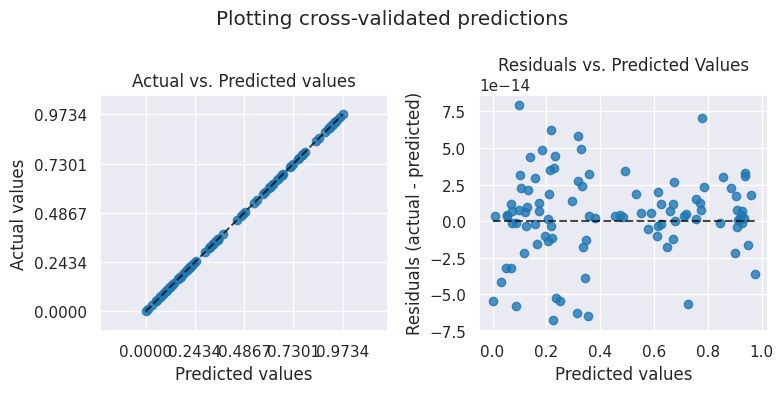

In [27]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X, y, cv=10)
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import KFold

In [29]:
X = loc1[features]
y = loc1['Power']
#Split dataset into 10 consecutive folds
kf = KFold(n_splits=10, shuffle=True)
model = LinearRegression()
results = []
counter = 0

In [30]:
for train_index, test_index in kf.split(X):
    counter = counter + 1
    X_train, y_train = X.values[train_index], y.values[train_index]
    X_test, y_test = X.values[test_index], y.values[test_index]
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    print(counter,":",mse)
    results.append(mse)

1 : 2.6577962623777377e-28
2 : 5.636342230482579e-29
3 : 3.433997609806905e-28
4 : 1.3122489138681885e-28
5 : 1.082698490020629e-27
6 : 9.282092552910599e-29
7 : 1.7757108477691246e-27
8 : 1.4075286029296878e-27
9 : 1.0099820448128647e-27
10 : 2.15073239459399e-27


In [31]:
avg_mse = np.mean(results)
print("AVERAGE MSE:", avg_mse)

AVERAGE MSE: 8.316241006565512e-28


RANDOM FOREST REGRESSION

In [32]:
X= loc1[features].copy()
y = loc1['Power']

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=40)
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy2 = model2.score(X_train,y_train)
accuracy2

0.9999999982388432

In [35]:
pred_df = pd.DataFrame({"Value": y_test, "Pred": pred2})

In [36]:
pred_df.head()

,Value,Pred
19019,0.6907,0.690686
2787,0.6935,0.693505
4211,0.6594,0.659411
41075,0.2742,0.274176
24976,0.0870,0.087009


In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mse = mean_squared_error(y_test, pred2)
mse

1.6477385844747649e-09

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
mae = mean_absolute_error(y_test, pred2)
mae

1.786210045663809e-05

ENSEMBLED

In [41]:
# Check the lengths
print(len(prediction), len(pred2), len(y_test))

# If `y_test` matches `prediction`, subset `pred2` accordingly
if len(prediction) == len(y_test):
    pred2 = pred2[:len(y_test)]
elif len(pred2) == len(y_test):
    prediction = prediction[:len(y_test)]
else:
    raise ValueError("Mismatch in prediction lengths with y_test")


4380 8760 8760


In [42]:
import numpy as np

# Example: If `pred2` is at a finer resolution, downsample it
pred2_resampled = pred2.reshape(-1, 2).mean(axis=1)

# Ensure the shapes now match
if len(prediction) == len(pred2_resampled):
    y_pred_ensemble = (prediction + pred2_resampled) / 2


In [43]:
y_pred_ensemble = (y_test + pred2) / 2
ensemble_mse = mean_squared_error(y_test, y_pred_ensemble)
ensemble_mae = mean_absolute_error(y_test, y_pred_ensemble)

print(f'Ensemble Model MSE: {ensemble_mse}')
print(f'Ensemble Model MAE: {ensemble_mae}')



Ensemble Model MSE: 4.119346461186924e-10
Ensemble Model MAE: 8.9310502283191e-06


In [44]:
pred_df = pd.DataFrame({"Value": y_test, "Pred": y_pred_ensemble})

In [45]:
pred_df.head()

,Value,Pred
19019,0.6907,0.690693
2787,0.6935,0.693503
4211,0.6594,0.659405
41075,0.2742,0.274188
24976,0.0870,0.087004
